## Import and load metric files

In [1]:
import os

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
STRATEGIES = [
    "degree",
    "coloring",
    "coloring_feasible",
    "optimal",
    "neural:rank",
    "neural:rel_deg"
]

METRICS_DIR = "outputs/outputs_medium"

all_metrics = pd.DataFrame()

for data_set in os.listdir(METRICS_DIR): 
    for branch in STRATEGIES:
        for bound in STRATEGIES:
            for pair in [True, False]:
                metrics_dir = os.path.join(METRICS_DIR, data_set, str(pair), branch + "+" + bound)
                if not (os.path.exists(metrics_dir)):
                    continue
                metric_files = sorted(os.listdir(metrics_dir))

                for metric_file in metric_files:
                    base = os.path.splitext(metric_file)[0]

                    df = pd.read_csv(os.path.join(metrics_dir, metric_file))
                    df["dataset"] = data_set
                    df["branch"] = branch
                    df["pair"] = pair
                    df["bound"] = bound
                    df["graph_id"] = base
                    all_metrics = all_metrics.append(df)

all_metrics = all_metrics.reset_index()
all_metrics.loc[all_metrics.branch == "neural:rank", "branch"] = "ch+rank"
all_metrics.loc[all_metrics.branch == "neural:rel_deg", "branch"] = "ch+rel_deg"

all_metrics.head()

,index,call_id,parent_call_id,recursion_depth,num_candidates,num_candidates_visited,num_graph_edges,larger_clique_discovered,seconds_in_call,seconds_in_heuristic,dataset,branch,pair,bound,graph_id
0,0,8,7,8,1,1,0,8,0.000005,0.000003,C.50.5,degree,False,coloring,00000
1,1,7,6,7,3,1,1,7,0.000009,0.000005,C.50.5,degree,False,coloring,00000
2,2,6,5,6,7,1,5,6,0.000016,0.000009,C.50.5,degree,False,coloring,00000
3,3,5,4,5,11,1,26,5,0.000035,0.000020,C.50.5,degree,False,coloring,00000
4,4,4,3,4,16,1,60,4,0.000049,0.000023,C.50.5,degree,False,coloring,00000


In [3]:
all_metrics.loc[all_metrics.bound != "neural"].groupby(
    ["dataset", "graph_id", "bound", "branch", "pair"]).max()[["larger_clique_discovered"]].groupby(
    ["dataset", "graph_id"]).std()["larger_clique_discovered"].sum()

0.0

## Summary of number of calls

In [4]:
num_calls = all_metrics[["branch", "bound", "pair", "dataset", "call_id"]] \
    .groupby(["branch", "bound", "pair", "dataset"]).count().reset_index()
work = all_metrics[["branch", "bound", "pair", "dataset", "num_graph_edges"]] \
    .groupby(["branch", "bound", "pair", "dataset"]).sum().reset_index()
work = work.rename(index=str, columns={"num_graph_edges": "work"})
num_calls.head()

,branch,bound,pair,dataset,call_id
0,ch+rank,coloring,False,C.50.5,2083
1,ch+rank,coloring,False,C.50.9,3702
2,ch+rank,coloring,False,brock50,2575
3,ch+rank,coloring,False,dsjc50,1226
4,ch+rank,coloring,False,hamm6,1598


## Performance on "medium" dataset

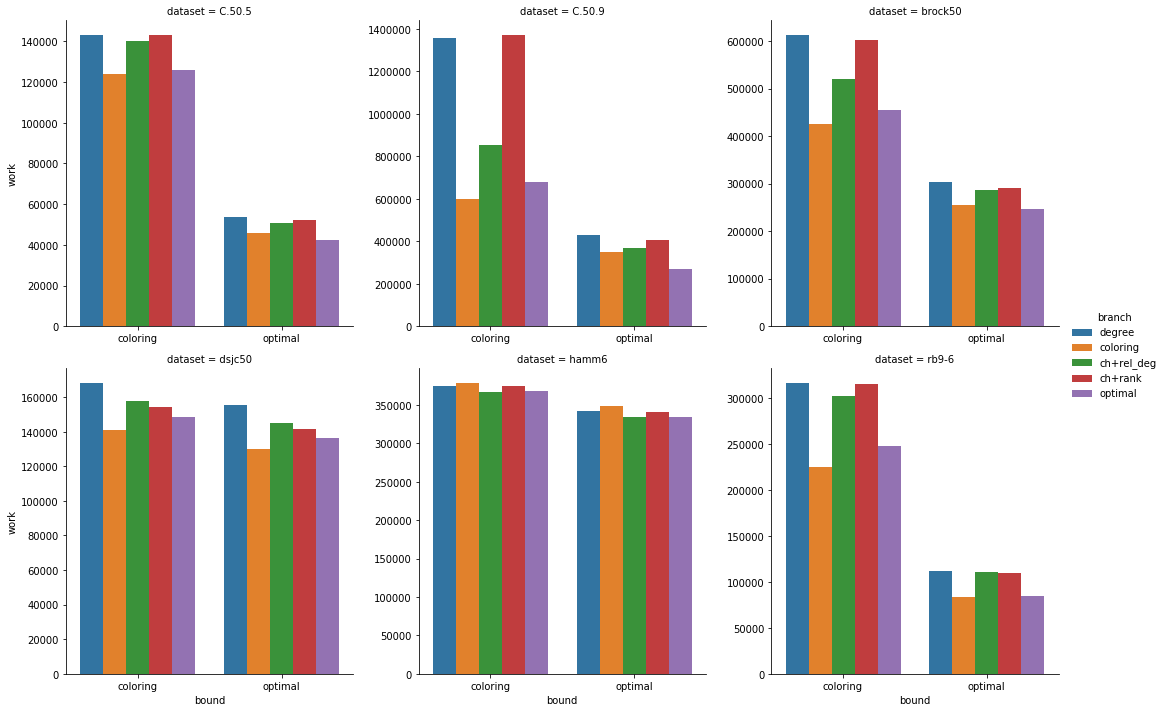

In [5]:
order = [
    "degree",
    "coloring",
    "ch+rel_deg",
    "ch+rank",
    "optimal",
]

num_calls["const"] = ""
work[""] = ""

grid = sns.catplot(data=work[(work.pair == False)], 
            x="bound", col="dataset", y="work", hue="branch", hue_order=order, 
            kind="bar", sharey=False, col_wrap=3, order=["coloring", "optimal"],
            sharex=False)
# grid.savefig("outputs/bb_50.png")

## Following figures were generated with "large" dataset

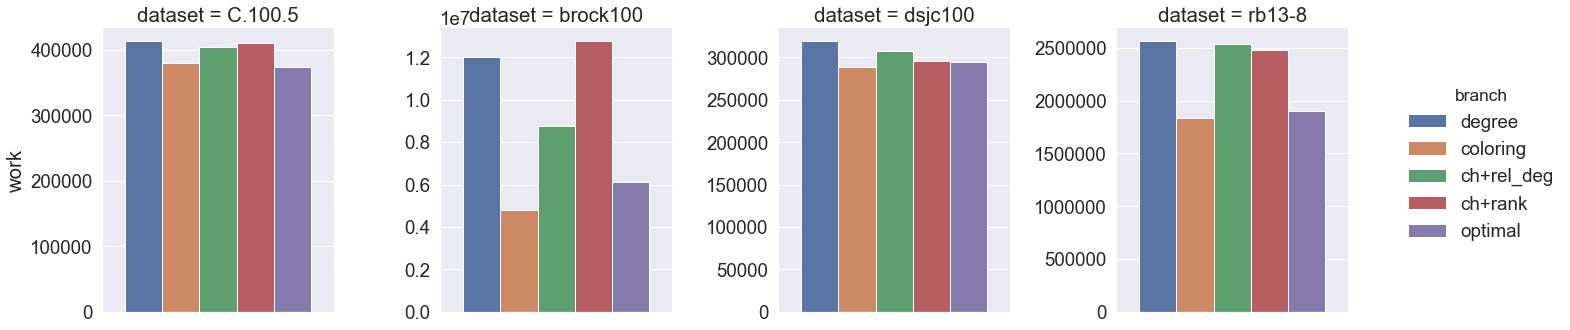

In [36]:
sns.set(font_scale=1.7) 
grid = sns.catplot(data=work[(work.pair == False) & (work.bound == "coloring")], 
            x="", col="dataset", y="work", hue="branch", hue_order=order, 
            kind="bar", sharey=False, margin_titles=True)
# grid.savefig("outputs/bb_100_coloring.png")

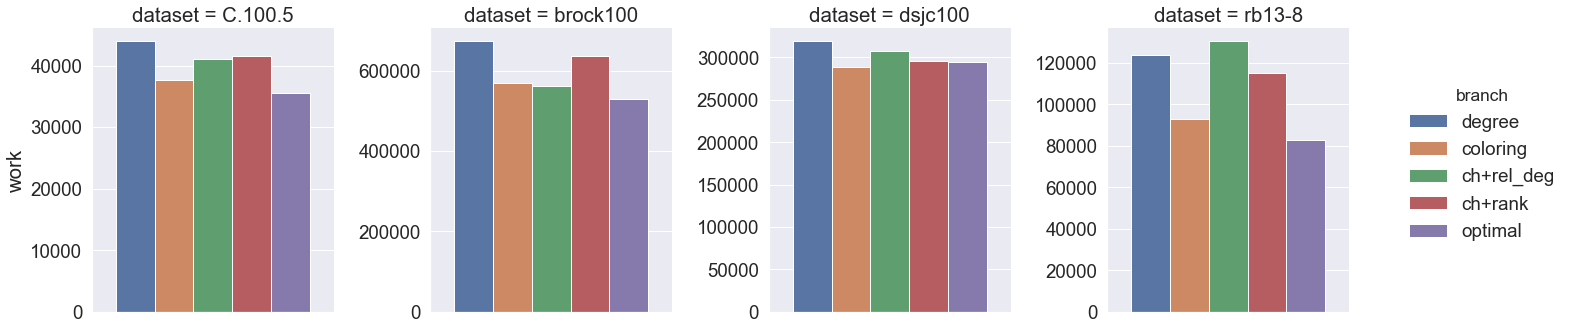

In [37]:
grid = sns.catplot(data=work[(work.pair == False) & (work.bound == "optimal")], 
            x="", col="dataset", y="work", hue="branch", hue_order=order, 
            kind="bar", sharey=False, margin_titles=True)
# grid.savefig("outputs/bb_100_optimal.png")